In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = pd.read_csv('/content/ToyotaCorolla - MLR.csv')

print(data.head())


   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  


              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

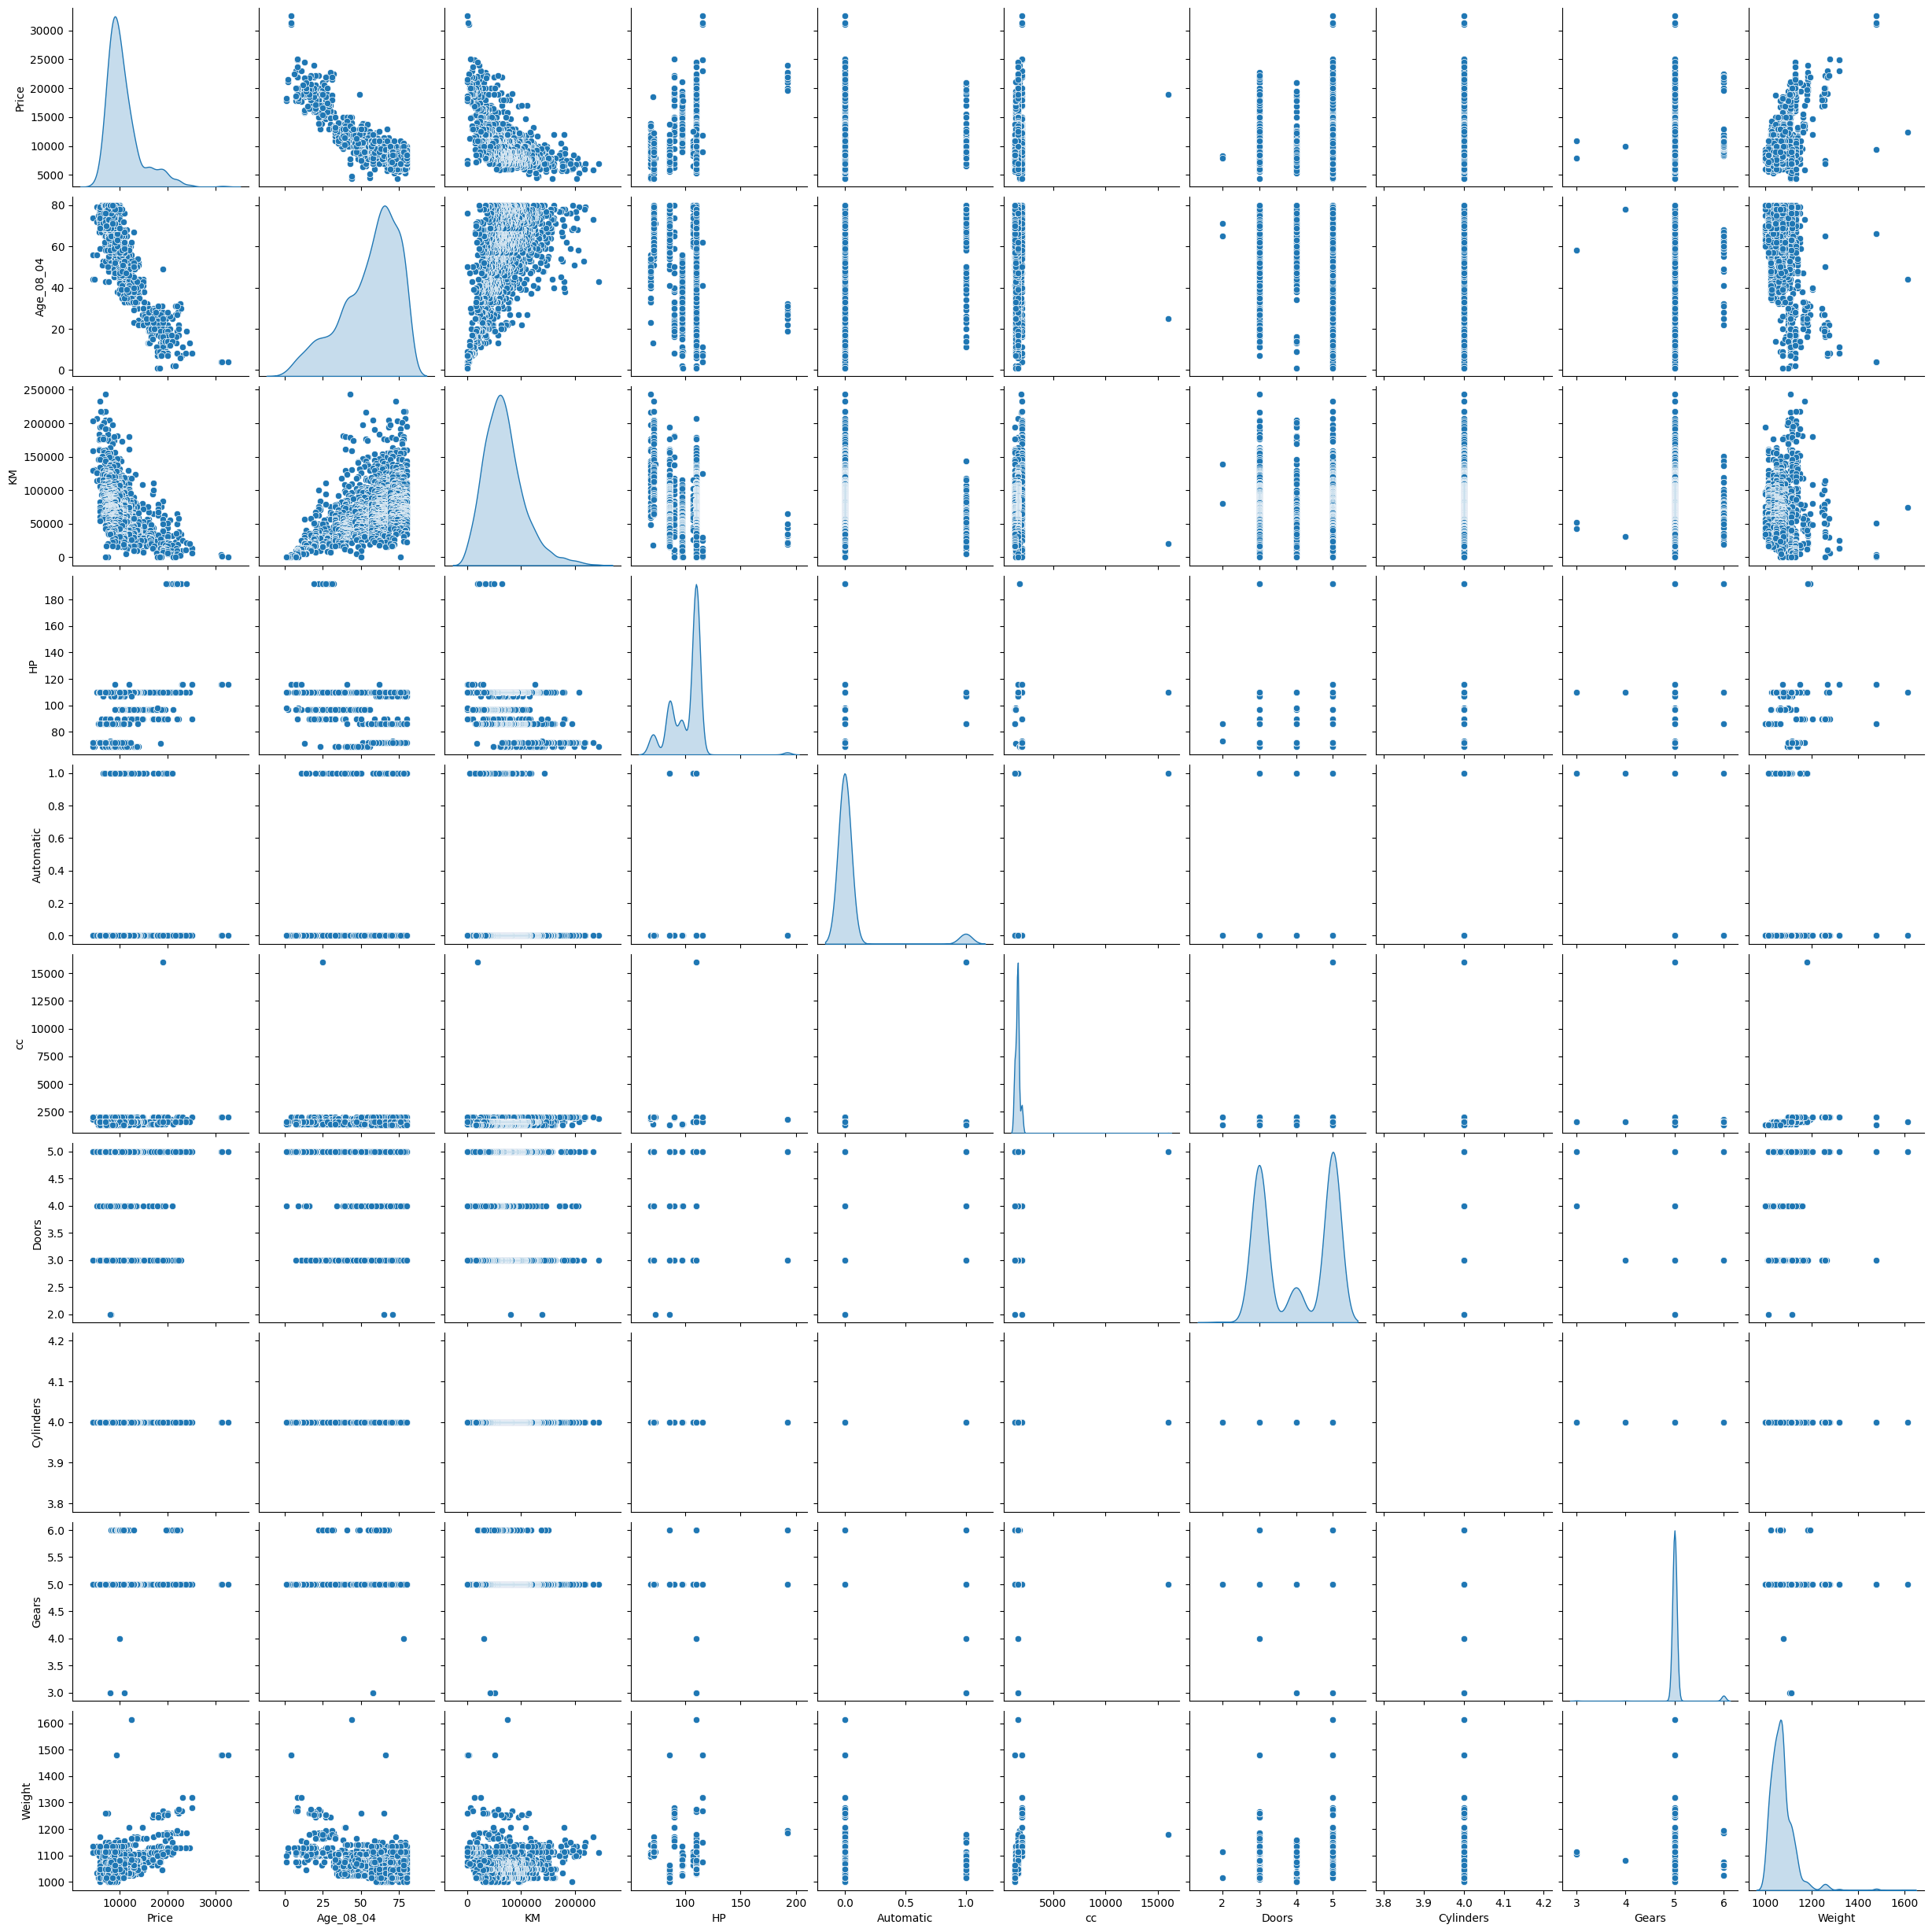

In [2]:
# Task 1: Exploratory Data Analysis (EDA)
print(data.describe())

print(data.isnull().sum())

sns.pairplot(data, diag_kind='kde')
plt.show()

numeric_data = data.select_dtypes(include=['number'])



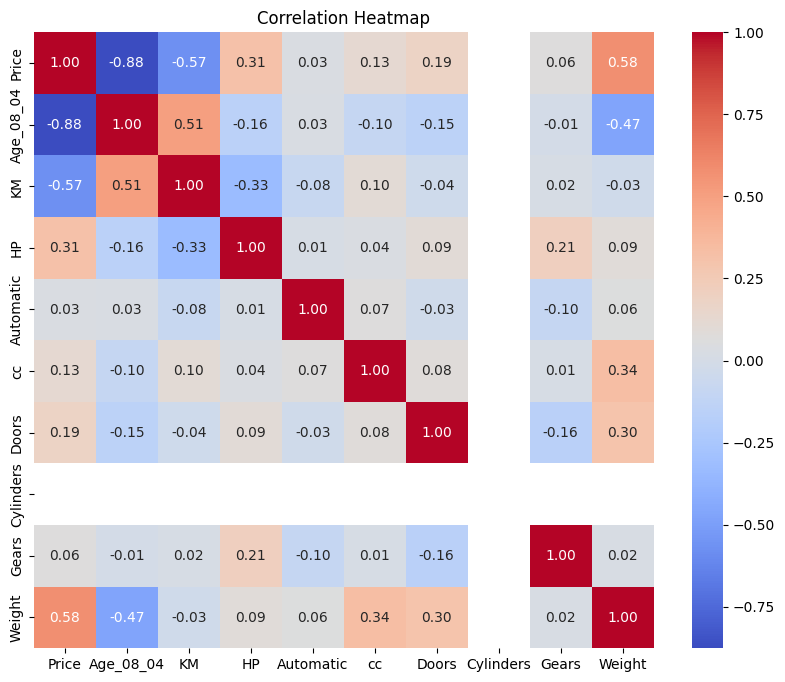

In [3]:

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


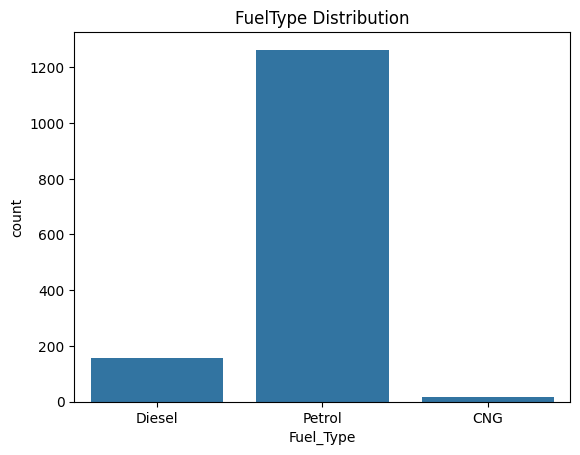

In [4]:
sns.countplot(x='Fuel_Type', data=data)
plt.title('FuelType Distribution')
plt.show()

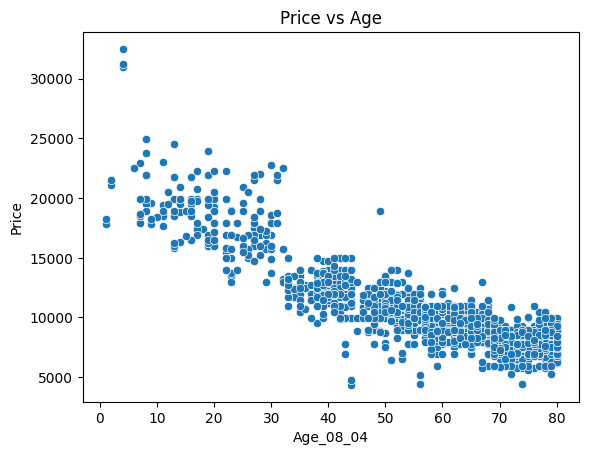

In [5]:
sns.scatterplot(x='Age_08_04', y='Price', data=data)
plt.title('Price vs Age')
plt.show()


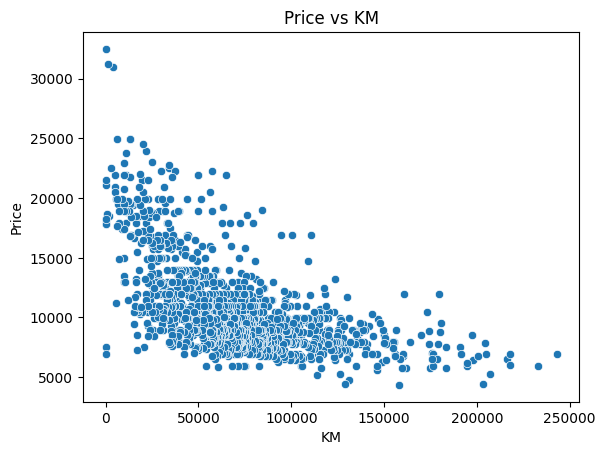

In [6]:
sns.scatterplot(x='KM', y='Price', data=data)
plt.title('Price vs KM')
plt.show()

In [7]:

# Data Preprocessing
# Define feature matrix X and target variable y
X = data[['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors','Cylinders','Gears', 'Weight']]
y = data['Price']

categorical_features = ['Fuel_Type']
numerical_features = ['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors','Cylinders','Gears', 'Weight']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

In [8]:
#Task 2: Split the dataset
# -----------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Task 3: Build Multiple Linear Regression Models
# -----------------------------------------

model1 = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
model1.fit(X_train, y_train)

print("Model 1 Coefficients:", model1.named_steps['regressor'].coef_)

model2 = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Ridge(alpha=1.0))])
model2.fit(X_train, y_train)

model3 = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Lasso(alpha=0.1))])
model3.fit(X_train, y_train)

Model 1 Coefficients: [-2.26729478e+03 -6.11654412e+02  2.08349858e+02  3.43971298e+01
 -1.41619166e+01 -5.74678039e+01 -7.95807864e-13  1.09340417e+02
  1.31681831e+03 -6.85487568e+01  1.37080891e+03]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age_08_04', 'KM', 'HP',
                                                   'Automatic', 'cc', 'Doors',
                                                   'Cylinders', 'Gears',
                                                   'Weight']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Fuel_Type'])])),
                ('regressor', Lasso(alpha=0.1))])

In [10]:
# Task 4: Evaluate Models
# -----------------------------------------

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

mse1, r2_1 = evaluate_model(model1, X_test, y_test)
print(f"Model 1 - MSE: {mse1:.2f}, R2: {r2_1:.2f}")


mse2, r2_2 = evaluate_model(model2, X_test, y_test)
print(f"Model 2 - MSE: {mse2:.2f}, R2: {r2_2:.2f}")

mse3, r2_3 = evaluate_model(model3, X_test, y_test)
print(f"Model 3 - MSE: {mse3:.2f}, R2: {r2_3:.2f}")


Model 1 - MSE: 2203043.82, R2: 0.83
Model 2 - MSE: 2197493.74, R2: 0.84
Model 3 - MSE: 2202045.40, R2: 0.83


In [11]:
# Task 5: Apply Lasso and Ridge


print("\nSummary of Model Performance:")
print(f"Model 1 (Linear Regression): MSE={mse1:.2f}, R2={r2_1:.2f}")
print(f"Model 2 (Ridge): MSE={mse2:.2f}, R2={r2_2:.2f}")
print(f"Model 3 (Lasso): MSE={mse3:.2f}, R2={r2_3:.2f}")


print("Normalization rescales features to a range [0,1] or [-1,1].")
print("Standardization centers data around the mean with unit variance.")

print("Techniques include removing highly correlated predictors, using PCA, or applying regularization like Ridge/Lasso.")



Summary of Model Performance:
Model 1 (Linear Regression): MSE=2203043.82, R2=0.83
Model 2 (Ridge): MSE=2197493.74, R2=0.84
Model 3 (Lasso): MSE=2202045.40, R2=0.83
Normalization rescales features to a range [0,1] or [-1,1].
Standardization centers data around the mean with unit variance.
Techniques include removing highly correlated predictors, using PCA, or applying regularization like Ridge/Lasso.
